### DSC 210 Course Project
# **Topic 10: Performance Analysis of Libraries and Tools on Linear Algebra Operations**

#### **Group number:** 4
#### **Group members:**

*   Harshil Jain (A59017538)
*   Sai Sree Harsha (A59020345)
*   Aditya Mandke (A59020008)
*   Omkar Bhope (A59016323)


This notebook contains the code to analyse the performance of 4 different libraries (NumPy, PyTorch, TensorFlow and JAX) on 14 different linear algebra operations.

In each of the following sections, we consider a particular linear algebra operation. We implement the operation using each of the 4 libraries, record the execution time for different sizes of input matrices and compare performance by plotting the results.



In [1]:
# import all required libraries
import jax
import time
import torch
import scipy
import numpy as np
import pandas as pd
import tensorflow as tf
import jax.numpy as jnp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set hardware device
device = torch.device("cuda:0")

# set random seeds
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
key = jax.random.PRNGKey(42)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from numba import cuda
def clear_gpu():
    device = cuda.get_current_device()
    device.reset()

Num GPUs Available:  1


### Matrix-matrix product

In [7]:
#JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  b = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  c = jnp.dot(a, b).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0001993489999989606 seconds
Execution time: 0.00020056299999993144 seconds
Execution time: 0.00016875300000052107 seconds
Execution time: 0.00025062799999986396 seconds
Execution time: 0.0002585289999998963 seconds
Execution time: 0.00039638099999983467 seconds
Execution time: 0.0003592220000001589 seconds
Execution time: 0.00043849799999939876 seconds
Execution time: 0.000545475999999212 seconds
Execution time: 0.0008189959999995722 seconds


In [8]:
# Torch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  b = torch.rand((k, k)).to(device)
  st = time.process_time()
  c = torch.mm(a, b)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.656881756999999 seconds
Execution time: 7.477199999961215e-05 seconds
Execution time: 5.511500000032754e-05 seconds
Execution time: 7.485200000090231e-05 seconds
Execution time: 9.871600000010972e-05 seconds
Execution time: 0.00011426400000047465 seconds
Execution time: 0.00040355299999994543 seconds
Execution time: 0.000699220999999639 seconds
Execution time: 0.0005180060000000708 seconds
Execution time: 0.0005747029999998432 seconds


In [9]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  b = tf.random.uniform((k, k))
  st = time.process_time()
  c = tf.matmul(a, b)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.528371276999998 seconds
Execution time: 0.000148837000001123 seconds
Execution time: 0.00011511099999950147 seconds
Execution time: 0.00013540300000158823 seconds
Execution time: 0.0003654429999997433 seconds
Execution time: 0.000189653999999706 seconds
Execution time: 0.0001488300000005438 seconds
Execution time: 0.00015929499999955965 seconds
Execution time: 0.0001195359999996981 seconds
Execution time: 0.00374474399999869 seconds


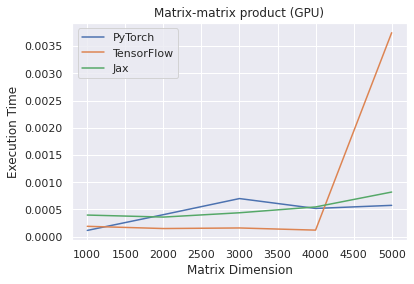

In [10]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:, :]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Matrix-matrix product (GPU)')
plt.legend()
plt.show()

### Matrix-vector product

In [8]:
#JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  b = jax.random.uniform(key=key, shape=(k, 1))
  st = time.process_time()
  c = jnp.dot(a, b).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00018750299999936715 seconds
Execution time: 0.00018753400000015574 seconds
Execution time: 0.00014572799999967856 seconds
Execution time: 0.00016975499999993815 seconds
Execution time: 0.00014731600000139622 seconds
Execution time: 0.0002138219999991975 seconds
Execution time: 0.00022125399999950446 seconds
Execution time: 0.0002168720000010893 seconds
Execution time: 0.0002496290000006951 seconds
Execution time: 0.0002451220000008192 seconds


In [9]:
# Torch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  b = torch.rand((k, 1)).to(device)
  st = time.process_time()
  c = torch.mm(a, b)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.869255806 seconds
Execution time: 8.495299999999872e-05 seconds
Execution time: 6.326299999948048e-05 seconds
Execution time: 5.0415000000469945e-05 seconds
Execution time: 5.346999999922275e-05 seconds
Execution time: 7.722099999973864e-05 seconds
Execution time: 0.00010964400000013086 seconds
Execution time: 0.00013737999999996475 seconds
Execution time: 0.00012539099999919756 seconds
Execution time: 9.969499999940012e-05 seconds


In [10]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  b = tf.random.uniform((k, 1))
  st = time.process_time()
  c = tf.matmul(a, b)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.7203717340000004 seconds
Execution time: 0.00018812699999770643 seconds
Execution time: 0.00011567399999989902 seconds
Execution time: 0.00015249599999833663 seconds
Execution time: 0.00017092399999896202 seconds
Execution time: 0.0001251039999985437 seconds
Execution time: 0.00012185699999989197 seconds
Execution time: 0.0001352150000002439 seconds
Execution time: 0.0001687210000014261 seconds
Execution time: 0.00015195499999975937 seconds


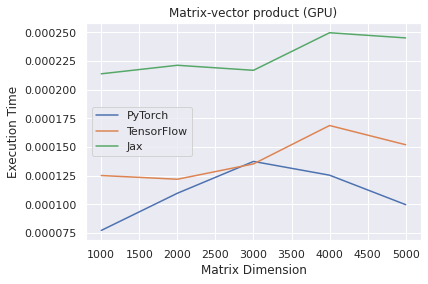

In [13]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:, :]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Matrix-vector product (GPU)')
plt.legend()
plt.show()

### Vector-vector product

In [3]:
#JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(1, k))
  b = jax.random.uniform(key=key, shape=(k, 1))
  st = time.process_time()
  c = jnp.dot(a, b).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00017966900000132568 seconds
Execution time: 0.00020362499999926342 seconds
Execution time: 0.00016167899999963709 seconds
Execution time: 0.0001558470000002643 seconds
Execution time: 0.0001676839999991131 seconds
Execution time: 0.00014015800000066747 seconds
Execution time: 0.00014734900000057394 seconds
Execution time: 0.00017090500000094266 seconds
Execution time: 0.00015708399999958544 seconds
Execution time: 0.0001562029999995218 seconds


In [4]:
# Torch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((1, k)).to(device)
  b = torch.rand((k, 1)).to(device)
  st = time.process_time()
  c = torch.mm(a, b)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.6918780340000001 seconds
Execution time: 6.367699999998422e-05 seconds
Execution time: 4.94440000000651e-05 seconds
Execution time: 0.0001821499999987708 seconds
Execution time: 4.976800000022763e-05 seconds
Execution time: 4.802299999973059e-05 seconds
Execution time: 6.86099999995804e-05 seconds
Execution time: 4.493300000163458e-05 seconds
Execution time: 4.604399999941222e-05 seconds
Execution time: 4.582699999922113e-05 seconds


In [5]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((1, k))
  b = tf.random.uniform((k, 1))
  st = time.process_time()
  c = tf.matmul(a, b)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.5471745370000001 seconds
Execution time: 0.00015914800000160767 seconds
Execution time: 0.00010469000000057349 seconds
Execution time: 0.0001294800000017915 seconds
Execution time: 0.0001022810000002039 seconds
Execution time: 0.0001228589999975327 seconds
Execution time: 0.00011936900000009132 seconds
Execution time: 0.00011300399999925048 seconds
Execution time: 0.00010069600000051082 seconds
Execution time: 9.863600000059591e-05 seconds


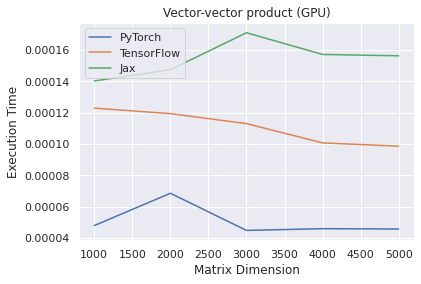

In [7]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:, :]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Vector-vector product (GPU)')
plt.legend()
plt.show()

### Trace

In [3]:
# JAX
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
jax_times = []
for k in dims:
  matrix = jax.random.uniform(key=key, shape=(k,k))
  st = time.process_time()   
  trace_jax = jnp.trace(matrix)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00015470299999975623 seconds
Execution time: 0.0001514549999992454 seconds
Execution time: 0.00011618299999938131 seconds
Execution time: 0.00015112900000069374 seconds
Execution time: 0.000172690999999503 seconds
Execution time: 0.0001726299999997849 seconds
Execution time: 6.921599999998307e-05 seconds
Execution time: 8.206800000110093e-05 seconds
Execution time: 8.376000000076544e-05 seconds
Execution time: 9.829299999886132e-05 seconds


In [4]:
# PyTorch
clear_gpu()
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
torch_times = []
for k in dims:
  matrix = torch.rand(k, k).to(device)
  st = time.process_time()   
  trace_torch = torch.trace(matrix)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0003778309999997731 seconds
Execution time: 7.300999999948488e-05 seconds
Execution time: 0.0001945499999997935 seconds
Execution time: 6.374300000011601e-05 seconds
Execution time: 9.207300000113605e-05 seconds
Execution time: 9.506199999975706e-05 seconds
Execution time: 0.00017662399999984757 seconds
Execution time: 0.00020358599999958926 seconds
Execution time: 0.0001808639999989481 seconds
Execution time: 0.00019335399999853564 seconds


In [5]:
# TF
clear_gpu()
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
tf_times = []
for k in dims:
  matrix = tf.random.uniform((k,k))
  st = time.process_time()   
  trace_tf = tf.linalg.trace(matrix)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.004061266000000785 seconds
Execution time: 0.0004210569999987257 seconds
Execution time: 0.0003520359999988898 seconds
Execution time: 0.0003301550000003317 seconds
Execution time: 0.00033238600000018437 seconds
Execution time: 0.00033296600000021215 seconds
Execution time: 0.0003515689999993299 seconds
Execution time: 0.00035256700000019237 seconds
Execution time: 0.0003203630000001567 seconds
Execution time: 0.0003393470000006005 seconds


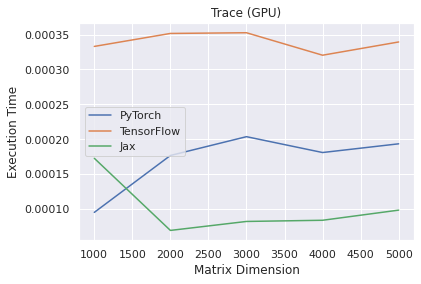

In [7]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:, :]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Trace (GPU)')
plt.legend()
plt.show()

### Transpose

In [4]:
# JAX
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
jax_times = []
for k in dims:
  matrix = jax.random.normal(key=key, shape=(k,k))
  st = time.process_time()   
  transpose_jax = jnp.transpose(matrix)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0004779010000000028 seconds
Execution time: 0.00040193300000090915 seconds
Execution time: 0.00035430600000019297 seconds
Execution time: 0.0003537470000001264 seconds
Execution time: 0.00035670799999998337 seconds
Execution time: 0.0016265059999991394 seconds
Execution time: 0.0003697359999996763 seconds
Execution time: 0.0002941630000012907 seconds
Execution time: 0.0004949469999999678 seconds
Execution time: 0.00018901400000004287 seconds


In [5]:
# PyTorch
clear_gpu()
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
torch_times = []
for k in dims:
  matrix = torch.rand(k, k).to(device)
  st = time.process_time()   
  transpose_torch = torch.transpose(matrix,0,1)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0002866039999993575 seconds
Execution time: 2.6116000000797612e-05 seconds
Execution time: 2.0921999999146124e-05 seconds
Execution time: 2.275299999965341e-05 seconds
Execution time: 2.645500000042489e-05 seconds
Execution time: 2.314999999875056e-05 seconds
Execution time: 3.008400000048539e-05 seconds
Execution time: 6.091700000077083e-05 seconds
Execution time: 5.667400000142209e-05 seconds
Execution time: 0.001166607999998348 seconds


In [6]:
# TF
clear_gpu()
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
tf_times = []
for k in dims:
  matrix = tf.random.uniform((k,k))
  st = time.process_time()    
  tranpose_matrix = tf.linalg.matrix_transpose(matrix)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.005143676000001207 seconds
Execution time: 0.0005446469999998982 seconds
Execution time: 0.00036962799999962215 seconds
Execution time: 0.00036099699999958546 seconds
Execution time: 0.0003792319999984528 seconds
Execution time: 0.0003958889999999826 seconds
Execution time: 0.003868745000000118 seconds
Execution time: 0.0016794180000001546 seconds
Execution time: 0.00036606499999969344 seconds
Execution time: 0.004408677000000694 seconds


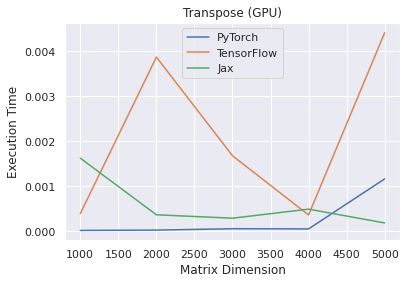

In [10]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Transpose (GPU)')
plt.legend()
plt.show()

### Determinant

In [5]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  c = jnp.linalg.det(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0007310699999987236 seconds
Execution time: 0.0007247869999993384 seconds
Execution time: 0.0007458799999984222 seconds
Execution time: 0.0009850740000008074 seconds
Execution time: 0.0020650470000003196 seconds
Execution time: 0.005778103999999118 seconds
Execution time: 0.0155244519999993 seconds
Execution time: 0.03105594200000006 seconds
Execution time: 0.0800990860000006 seconds
Execution time: 0.06569889900000092 seconds


In [6]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  st = time.process_time()
  torch.linalg.det(a)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 1.682759977 seconds
Execution time: 0.6615837059999983 seconds
Execution time: 0.000592411999999598 seconds
Execution time: 0.0009228239999998777 seconds
Execution time: 0.0023134959999993043 seconds
Execution time: 0.0060188799999991716 seconds
Execution time: 0.022990678999999403 seconds
Execution time: 0.048856365999998985 seconds
Execution time: 0.0758777949999967 seconds
Execution time: 0.10959524900000162 seconds


In [7]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.det(a, name = None)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.5968575639999969 seconds
Execution time: 0.0003357269999995083 seconds
Execution time: 0.00032165000000006216 seconds
Execution time: 0.49567243599999955 seconds
Execution time: 0.003045820000000532 seconds
Execution time: 0.006818509999998668 seconds
Execution time: 0.01697220599999838 seconds
Execution time: 0.047266284999999186 seconds
Execution time: 0.06125603299999938 seconds
Execution time: 0.06472094000000084 seconds


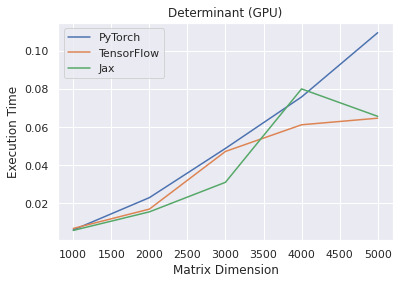

In [10]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Determinant (GPU)')
plt.legend()
plt.show()

### Inverse

In [4]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jnp.linalg.inv(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0003466000000003078 seconds
Execution time: 0.00042215999999939413 seconds
Execution time: 0.0004918209999988932 seconds
Execution time: 0.0008414670000007618 seconds
Execution time: 0.0021715430000011082 seconds
Execution time: 0.007778451000000075 seconds
Execution time: 0.015509438000000486 seconds
Execution time: 0.034386282999999906 seconds
Execution time: 0.09541770500000091 seconds
Execution time: 0.10041103200000023 seconds


In [5]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  st = time.process_time()
  torch.linalg.inv(a)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.32840168999999975 seconds
Execution time: 0.49927839099999893 seconds
Execution time: 0.001182192999999998 seconds
Execution time: 0.003959252999999663 seconds
Execution time: 0.009345007000000294 seconds
Execution time: 0.019445227000000287 seconds
Execution time: 0.055378987999999296 seconds
Execution time: 0.11054924199999938 seconds
Execution time: 0.1712165009999982 seconds
Execution time: 0.17629521199999942 seconds


In [6]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.inv(a, adjoint=False, name=None)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.45382255400000204 seconds
Execution time: 0.3770072219999996 seconds
Execution time: 0.0005753880000014533 seconds
Execution time: 0.0009239079999971977 seconds
Execution time: 0.0027133340000027317 seconds
Execution time: 0.005629964999997128 seconds
Execution time: 0.02781012699999863 seconds
Execution time: 0.05308058299999985 seconds
Execution time: 0.08580891200000096 seconds
Execution time: 0.08606238800000199 seconds


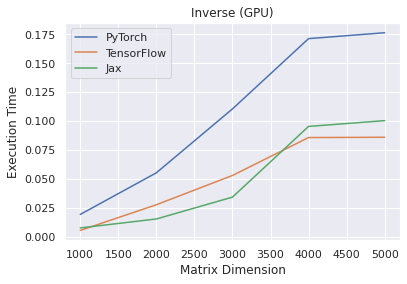

In [10]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Inverse (GPU)')
plt.legend()
plt.show()

### Adjoint

In [3]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  x = jnp.conjugate(a)
  jnp.transpose(x, axes=None)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0006928100000003212 seconds
Execution time: 0.0005629589999998075 seconds
Execution time: 0.0006001229999998969 seconds
Execution time: 0.000567548000001139 seconds
Execution time: 0.0005597870000002558 seconds
Execution time: 0.0006648419999990551 seconds
Execution time: 0.000648970000000304 seconds
Execution time: 0.0005452720000000966 seconds
Execution time: 0.0005272089999994733 seconds
Execution time: 0.00045593499999974085 seconds


In [4]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  st = time.process_time()
  a.adjoint()
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00012035299999979543 seconds
Execution time: 2.132400000043333e-05 seconds
Execution time: 1.7673000000328898e-05 seconds
Execution time: 1.8617000000276107e-05 seconds
Execution time: 2.0600000000925434e-05 seconds
Execution time: 2.147800000074085e-05 seconds
Execution time: 3.8938999999516e-05 seconds
Execution time: 4.4894000000184064e-05 seconds
Execution time: 6.677999999915585e-05 seconds
Execution time: 0.0012425389999997094 seconds


In [5]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.adjoint(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.001796209000000104 seconds
Execution time: 0.0003714920000010835 seconds
Execution time: 0.0003089380000016462 seconds
Execution time: 0.0003558970000003825 seconds
Execution time: 0.0007274229999989501 seconds
Execution time: 0.0006951720000003547 seconds
Execution time: 0.0009644000000008646 seconds
Execution time: 0.0033947780000005423 seconds
Execution time: 0.00031766700000090964 seconds
Execution time: 0.0003231719999998717 seconds


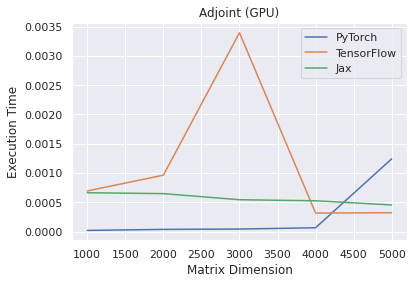

In [6]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Adjoint (GPU)')
plt.legend()
plt.show()

### Cholesky Decomposition

In [4]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  a = jnp.dot(a,jnp.transpose(a))
  st = time.process_time()
  jnp.linalg.cholesky(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00016443499999851952 seconds
Execution time: 0.0001494489999984694 seconds
Execution time: 0.00022955700000082402 seconds
Execution time: 0.0004761670000004159 seconds
Execution time: 0.0007639350000001599 seconds
Execution time: 0.001024789000000581 seconds
Execution time: 0.0018541649999992416 seconds
Execution time: 0.0019922609999998286 seconds
Execution time: 0.05029933399999997 seconds
Execution time: 0.0990301080000009 seconds


In [5]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  a = torch.mm(a,torch.t(a))
  a.add_(torch.eye(k).to(device))
  st = time.process_time()
  torch.linalg.cholesky(a, upper=False, out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.23026081100000084 seconds
Execution time: 0.00021481499999964626 seconds
Execution time: 0.0003119630000014695 seconds
Execution time: 0.000778731999998783 seconds
Execution time: 0.0021704410000005225 seconds
Execution time: 0.0032893099999995457 seconds
Execution time: 0.008697642999997868 seconds
Execution time: 0.017843567999999976 seconds
Execution time: 0.03014373899999967 seconds
Execution time: 0.04369041200000012 seconds


In [6]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  a = tf.tensordot(a,tf.transpose(a), axes = 1)
  st = time.process_time()
  tf.linalg.cholesky(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.28981914900000305 seconds
Execution time: 0.00030405300000069246 seconds
Execution time: 0.0003001339999997299 seconds
Execution time: 0.00036101799999954665 seconds
Execution time: 0.0005855409999995231 seconds
Execution time: 0.0007452549999982239 seconds
Execution time: 0.0022453829999982133 seconds
Execution time: 0.004009252999999546 seconds
Execution time: 0.009141732999999874 seconds
Execution time: 0.01380996099999976 seconds


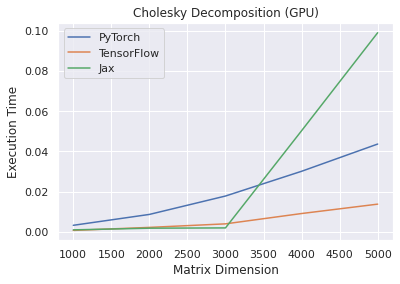

In [7]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Cholesky Decomposition (GPU)')
plt.legend()
plt.show()

### LU Decomposition

In [3]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jax.lax.linalg.lu(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0005693969999995829 seconds
Execution time: 0.0005817500000002696 seconds
Execution time: 0.0005025480000000471 seconds
Execution time: 0.0008162970000000769 seconds
Execution time: 0.0021860989999993308 seconds
Execution time: 0.005984018999999563 seconds
Execution time: 0.015130756999999662 seconds
Execution time: 0.026699561000000926 seconds
Execution time: 0.034410002999999634 seconds
Execution time: 0.05057238600000069 seconds


In [4]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  st = time.process_time()
  torch.linalg.lu(a, pivot=True, out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.33787354000000036 seconds
Execution time: 0.5052817110000003 seconds
Execution time: 0.0003845959999999593 seconds
Execution time: 0.000536266999999313 seconds
Execution time: 0.0014038739999993055 seconds
Execution time: 0.0042473090000001434 seconds
Execution time: 0.023009110000000277 seconds
Execution time: 0.05112174699999983 seconds
Execution time: 0.0888885479999999 seconds
Execution time: 0.1044570070000006 seconds


In [5]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.lu(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.5771959039999999 seconds
Execution time: 0.0004301640000008433 seconds
Execution time: 0.00034261200000074155 seconds
Execution time: 0.49117646699999895 seconds
Execution time: 0.003058557000002793 seconds
Execution time: 0.008209003000001047 seconds
Execution time: 0.02363838700000187 seconds
Execution time: 0.03528514699999974 seconds
Execution time: 0.0427974469999981 seconds
Execution time: 0.07061593599999938 seconds


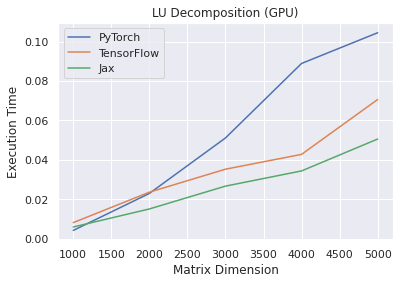

In [7]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('LU Decomposition (GPU)')
plt.legend()
plt.show()

### QR Factorization

In [3]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jnp.linalg.qr(a, mode='reduced')
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00043031600000098535 seconds
Execution time: 0.000332729999998449 seconds
Execution time: 0.0005155099999996082 seconds
Execution time: 0.0005031410000011505 seconds
Execution time: 0.0014458819999987327 seconds
Execution time: 0.0015357630000014666 seconds
Execution time: 0.002893799999998947 seconds
Execution time: 0.03472865500000033 seconds
Execution time: 0.09291422599999954 seconds
Execution time: 0.1806630329999983 seconds


In [4]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  st = time.process_time()
  torch.linalg.qr(a, mode='reduced', out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.8042339260000002 seconds
Execution time: 0.00041161599999917087 seconds
Execution time: 0.0003818780000006683 seconds
Execution time: 0.0007288810000005697 seconds
Execution time: 0.0009346790000002159 seconds
Execution time: 0.001495071999999098 seconds
Execution time: 0.0033154359999993943 seconds
Execution time: 0.00481773099999927 seconds
Execution time: 0.00628581199999978 seconds
Execution time: 0.05508392299999976 seconds


In [5]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.qr(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0015018619999978 seconds
Execution time: 0.001179103000001902 seconds
Execution time: 0.0024161430000013695 seconds
Execution time: 0.010502390999999278 seconds
Execution time: 0.03288544299999785 seconds
Execution time: 0.13825788899999836 seconds
Execution time: 1.249863787999999 seconds
Execution time: 4.018824371000001 seconds
Execution time: 10.225912461 seconds
Execution time: 21.589416444 seconds


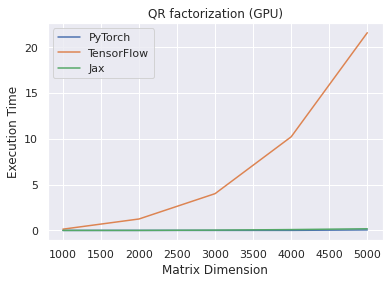

In [6]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('QR factorization (GPU)')
plt.legend()
plt.show()

### Eigen Decomposition

In [4]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000] #, 2000, 3000] # 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jnp.linalg.eigh(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0008463110000000995 seconds
Execution time: 0.002562909999999974 seconds
Execution time: 0.005052478999999721 seconds
Execution time: 0.024214761999999723 seconds
Execution time: 0.05334078399999953 seconds
Execution time: 0.09781040299999866 seconds


In [5]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000] #, 2000, 3000] # 4000, 5000]
for k in dims:
  a = torch.rand((k, k)).to(device)
  st = time.process_time()
  torch.linalg.eig(a, out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.005941623000000007 seconds
Execution time: 0.0023843770000002706 seconds
Execution time: 0.0088871699999995 seconds
Execution time: 0.04391318899999952 seconds
Execution time: 0.2335347480000003 seconds
Execution time: 0.6382344850000017 seconds


In [6]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000]# 2000, 3000] # 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.eig(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0009863679999995156 seconds
Execution time: 0.003148558999999551 seconds
Execution time: 0.020905172999999166 seconds
Execution time: 0.5608219039999973 seconds
Execution time: 4.931341902 seconds
Execution time: 29.304011889999998 seconds


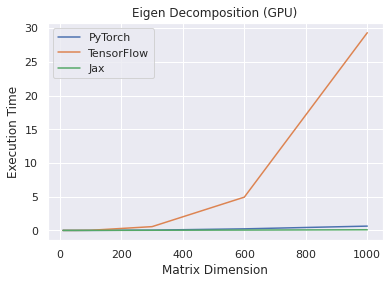

In [8]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
# times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Eigen Decomposition (GPU)')
plt.legend()
plt.show()

### PCA

In [4]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = jax.random.uniform(key, shape=(k,k)) 
  st = time.process_time()
  x = x - x.mean(axis = 0)
  cov = jnp.cov(x.T) / x.shape[0]
  v, w = jnp.linalg.eigh(cov)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.001854979000000867 seconds
Execution time: 0.003586888000000954 seconds
Execution time: 0.005946530000001005 seconds
Execution time: 0.02524897600000031 seconds
Execution time: 0.05629320400000104 seconds
Execution time: 0.11112254599999893 seconds
Execution time: 0.16831395699999874 seconds
Execution time: 0.2918213860000005 seconds


In [5]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = torch.rand(k, k).to(device)
  st = time.process_time()
  x = x - x.mean(axis = 0)
  cov = torch.cov(x.T) / x.shape[0]
  v, w = torch.linalg.eigh(cov)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.8266437740000008 seconds
Execution time: 0.0026808570000014242 seconds
Execution time: 0.0058481300000003955 seconds
Execution time: 0.026863363000000362 seconds
Execution time: 0.056367741000002525 seconds
Execution time: 0.10737645100000037 seconds
Execution time: 0.16413647199999915 seconds
Execution time: 0.30262301299999805 seconds


In [6]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = tf.random.uniform((k, k))
  st = time.process_time()
  x = x - tf.reduce_mean(x, axis=0)
  ans = tf.linalg.eigh(tf.tensordot(tf.transpose(x), x, axes=1))
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.8181613110000008 seconds
Execution time: 0.0033022520000010047 seconds
Execution time: 0.006102032000001145 seconds
Execution time: 0.025044684000000927 seconds
Execution time: 0.05421195799999978 seconds
Execution time: 0.10956979499999875 seconds
Execution time: 0.18763960299999738 seconds
Execution time: 0.32229140599999795 seconds


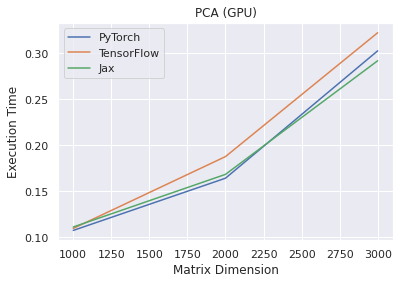

In [8]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:,:]
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('PCA (GPU)')
plt.legend()
plt.show()

### SVD

In [3]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = jax.random.uniform(key, shape=(k,k))
  st = time.process_time()
  svd = jnp.linalg.svd(x)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0013486890000002916 seconds
Execution time: 0.004637610999999708 seconds
Execution time: 0.01101269100000124 seconds
Execution time: 0.08226981800000033 seconds
Execution time: 0.24909193499999915 seconds
Execution time: 0.6408349229999999 seconds
Execution time: 4.534453037999999 seconds
Execution time: 14.038129697000002 seconds


In [4]:
# PyTorch
clear_gpu()
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = torch.rand(k, k).to(device)
  st = time.process_time()
  svd = torch.svd(x)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.324951304999999 seconds
Execution time: 0.0015274520000048142 seconds
Execution time: 0.0033571059999957242 seconds
Execution time: 0.014296500000000378 seconds
Execution time: 0.04223355800000661 seconds
Execution time: 0.15264790200000533 seconds
Execution time: 1.1284713020000012 seconds
Execution time: 4.062171184 seconds


In [5]:
# TF
clear_gpu()
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  with tf.GradientTape() as g:
    x = tf.random.uniform((k, k))
    st = time.process_time()
    svd = tf.linalg.svd(x)
    et = time.process_time()
    res = et - st
    tf_times.append(res)
    print('Execution time:', res, 'seconds')

Execution time: 0.8232580560000002 seconds
Execution time: 0.005008263999997098 seconds
Execution time: 0.012095055999999715 seconds
Execution time: 0.07721300299999712 seconds
Execution time: 0.24247278700000408 seconds
Execution time: 0.6474880860000027 seconds
Execution time: 4.507299855999996 seconds
Execution time: 13.313348736000002 seconds


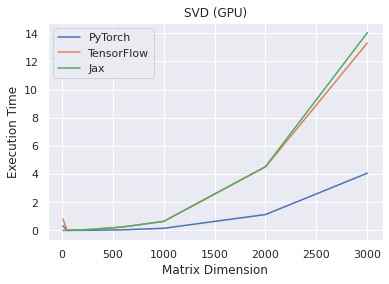

In [6]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})

sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('SVD (GPU)')
plt.legend()
plt.show()